### Importing

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import loading_dataset, outliers
warnings.filterwarnings('ignore')

ImportError: cannot import name 'outliers' from 'src.preprocessing' (c:\Users\Cabrel GANGBE\PROJECTS\Solar_radiation\src\preprocessing.py)

In [ ]:
df1 = loading_dataset('../data/benin-malanville.csv')
df2 = loading_dataset('../data/sierraleone-bumbuna.csv')
df3 = loading_dataset('../data/togo-dapaong_qc.csv')

df = pd.concat([df1, df2, df3])
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576800 entries, 2021-08-09 00:01:00 to 2022-10-25 00:00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   GHI            1576800 non-null  float64
 1   DNI            1576800 non-null  float64
 2   DHI            1576800 non-null  float64
 3   ModA           1576800 non-null  float64
 4   ModB           1576800 non-null  float64
 5   Tamb           1576800 non-null  float64
 6   RH             1576800 non-null  float64
 7   WS             1576800 non-null  float64
 8   WSgust         1576800 non-null  float64
 9   WSstdev        1576800 non-null  float64
 10  WD             1576800 non-null  float64
 11  WDstdev        1576800 non-null  float64
 12  BP             1576800 non-null  int64  
 13  Cleaning       1576800 non-null  int64  
 14  Precipitation  1576800 non-null  float64
 15  TModA          1576800 non-null  float64
 16  TModB          157680

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
Timestamp,,,,,,,,,,,,,,,,,,,
2021-09-13 02:17:00,-1.1,-0.2,-1.1,0.0,0.0,25.5,93.9,2.2,3.4,0.6,240.2,9.7,994,0,0.0,25.6,25.1,NaN,benin
2021-11-29 16:23:00,397.3,633.8,123.4,424.0,397.1,37.7,9.6,2.5,3.1,0.5,73.0,8.6,992,0,0.0,45.3,42.0,NaN,benin
2022-04-30 10:56:00,894.0,641.5,304.5,834.4,806.0,36.8,33.0,2.7,3.4,0.5,207.8,14.0,995,0,0.0,69.8,59.8,NaN,benin
2021-11-02 03:25:00,-2.6,0.0,0.0,0.0,0.0,23.3,89.9,2.0,2.6,0.5,232.2,8.4,976,0,0.0,22.4,22.1,NaN,togo
2021-11-27 12:49:00,915.0,903.0,146.1,996.0,959.0,36.6,17.2,3.1,4.1,0.8,106.8,18.0,994,0,0.0,62.8,52.3,NaN,benin


### Summary statistics

In [ ]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01,NaN
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01,NaN
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01,NaN
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01,NaN
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01,NaN
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01,NaN


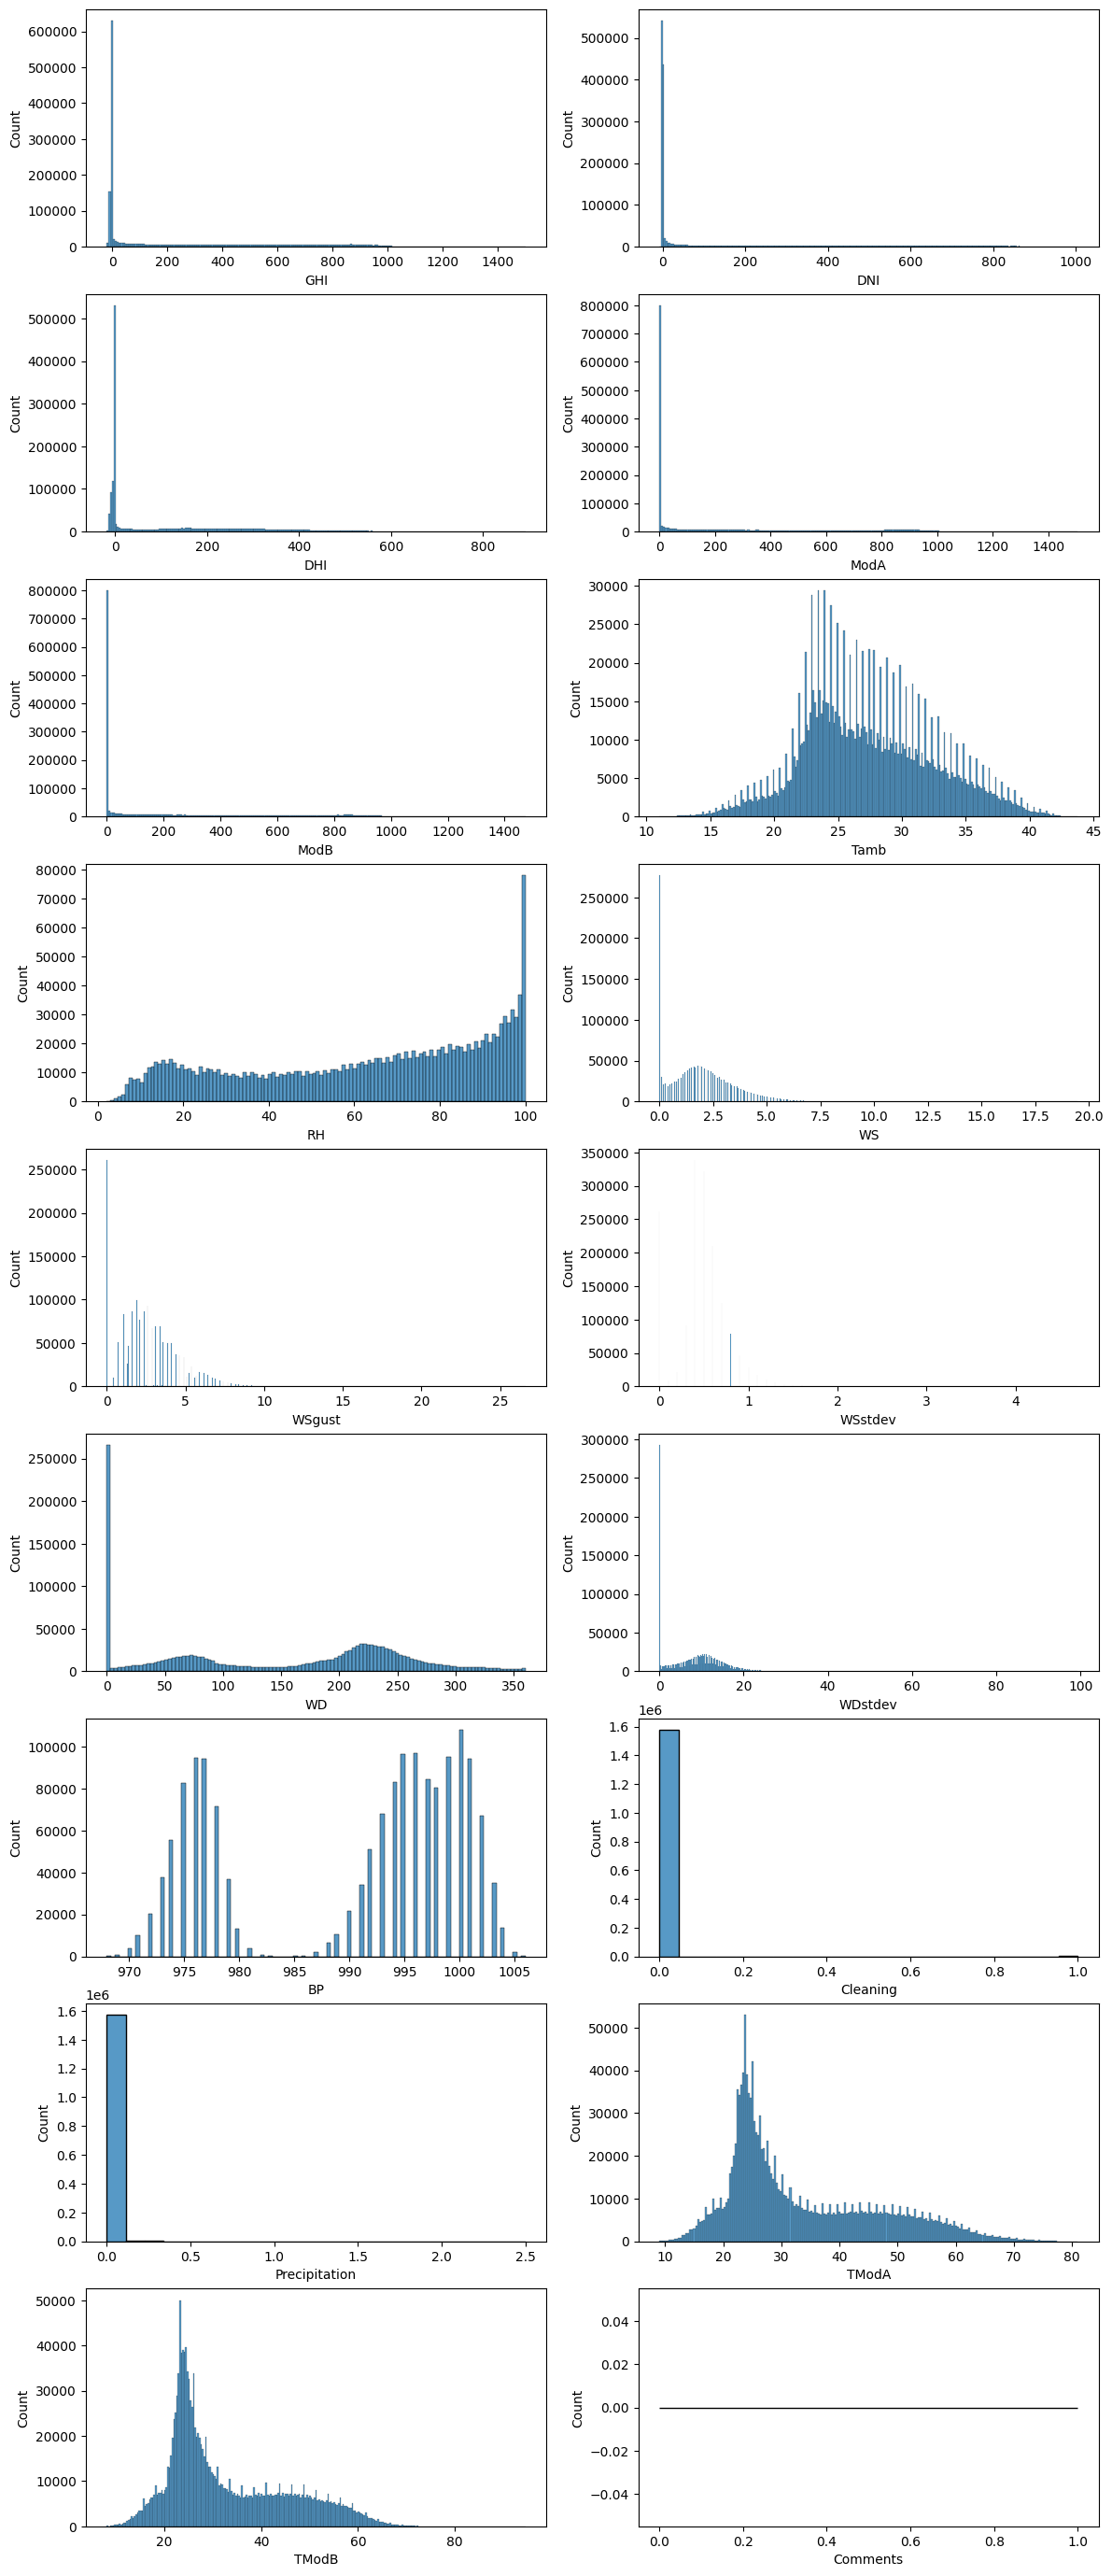

In [ ]:
plt.figure(figsize=(14,35))
for i, col in enumerate(df.select_dtypes("number").columns,1):
    plt.subplot(9,2,i)
    sns.histplot(df[col])

This picture caracterize the distribution for each quantitave variable. We notice a big variation within variables and no one of distributions is gaussian.

### Checking of missing values / outliers / incorrect entries

In [ ]:
l1 = ['GHI', 'DNI','DHI']
l2 = ['ModA', 'ModB','WS', 'WSgust']

In [2]:
#from src.preprocessing import outliers

# outliers(df, 'GHI')

ImportError: cannot import name 'outliers' from 'src.preprocessing' (c:\Users\Cabrel GANGBE\PROJECTS\Solar_radiation\src\preprocessing.py)